In [1]:
import time
import os
import glob
import numpy  as np
import tables as tb
import pandas as pd

# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

from invisible_cities.database  import load_db
from invisible_cities.io.dst_io import load_dst
from invisible_cities.io.dst_io import df_writer

In [2]:
plt.rcParams["font.size"]      = 15
plt.rcParams["font.family"]    = "sans-serif"
plt.rcParams["font.monospace"] = "Computer Modern Sans Serif"

In [3]:
# Open the PSF file and check the binning
psf = pd.read_hdf("../LT/Old_LT/NEXT100_PSF.h5", "/PSF/LightTable")
display(psf)

,dist_xy,z_m1,z_m2,z_m3,z_m4,z_m5,z_m6,z_m7,z_m8,z_m9,z_m10
0,0,4.915385e-05,5.875000e-05,6.278571e-05,6.870000e-05,7.750000e-05,8.891667e-05,1.002308e-04,1.140435e-04,1.278077e-04,1.548235e-04
1,1,5.060417e-05,5.583333e-05,6.028125e-05,6.733333e-05,7.873469e-05,8.653846e-05,9.840984e-05,1.134138e-04,1.301270e-04,1.500185e-04
2,2,5.146667e-05,5.588571e-05,6.052874e-05,6.858654e-05,7.657627e-05,8.515686e-05,9.662000e-05,1.096019e-04,1.280600e-04,1.473762e-04
3,3,5.045455e-05,5.447794e-05,6.048780e-05,6.584783e-05,7.466883e-05,8.372857e-05,9.334483e-05,1.059925e-04,1.212521e-04,1.404044e-04
4,4,4.880226e-05,5.396875e-05,5.966834e-05,6.579024e-05,7.210795e-05,8.175316e-05,8.991960e-05,1.032699e-04,1.179731e-04,1.346138e-04
...,...,...,...,...,...,...,...,...,...,...,...
495,495,4.289411e-08,4.337930e-08,4.198524e-08,4.369883e-08,4.082080e-08,4.208345e-08,4.406567e-08,4.352967e-08,4.256093e-08,4.407145e-08
496,496,4.375000e-08,4.311707e-08,4.239413e-08,3.856799e-08,4.009764e-08,4.152122e-08,4.214490e-08,3.893020e-08,4.038945e-08,3.898572e-08
497,497,3.766173e-08,3.933146e-08,4.045949e-08,4.107093e-08,3.868720e-08,3.512541e-08,3.947982e-08,4.044675e-08,3.877763e-08,3.699057e-08
498,498,3.380925e-08,3.613349e-08,3.435335e-08,3.652215e-08,3.598831e-08,3.560040e-08,3.306304e-08,3.770647e-08,3.777075e-08,3.572615e-08


In [4]:
get_file_number = lambda filename: int(filename.split("/")[-1].split("_")[1])

datadir = os.path.expandvars("../files/NEXT100_PSF_LT/")
filenames = sorted(glob.glob(datadir + "*.h5"))

filenames[:4]

['../files/NEXT100_PSF_LT/NEXT100_PSF_LT_770032_0.h5',
 '../files/NEXT100_PSF_LT/NEXT100_PSF_LT_770032_1.h5',
 '../files/NEXT100_PSF_LT/NEXT100_PSF_LT_770032_10.h5',
 '../files/NEXT100_PSF_LT/NEXT100_PSF_LT_770032_100.h5']

In [5]:
#### Configuration Params ####

# configure z binning
el_gap_width = 10.
dz    = 1.
zbins = np.arange(0, el_gap_width + dz, dz)
print(zbins)

# configure transverse binning
dd    = 1
dmax  = 500
dbins = np.arange(0, dmax + dd, dd)
print(dbins)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 

In [6]:
# Create dataframe, indexed by the transverse bin centres.
# columns = charge, entries
df = pd.DataFrame()
df["d_bin"]   = dbins[:-1]
df["charge"]  = np.zeros(len(dbins)-1)
df["entries"] = np.zeros(len(dbins)-1)
df = df.set_index("d_bin")

# display(df)

# Copy each dataframe for each slice in z
dfs = dict()
for z in zbins[:-1]: dfs[z] = df.copy()    

# Create a dict with number of events in each slice
nevents = dict()
for z in zbins[:-1]: nevents[z] = 0
display(nevents)

# Load in the database for SiPMs
detector_db = "next100"
datasipm = load_db.DataSiPM(detector_db, 0)
display(datasipm)

nphotons_in_file = []

{0.0: 0,
 1.0: 0,
 2.0: 0,
 3.0: 0,
 4.0: 0,
 5.0: 0,
 6.0: 0,
 7.0: 0,
 8.0: 0,
 9.0: 0}

,SensorID,ChannelID,Active,X,Y,adc_to_pes,Sigma
0,1000,1013,1,-489.825,-303.225,17.25,1.677
1,1001,1012,1,-489.825,-287.675,17.25,1.677
2,1002,1015,1,-489.825,-272.125,17.25,1.677
3,1003,1014,1,-489.825,-256.575,17.25,1.677
4,1004,1029,1,-489.825,-241.025,17.25,1.677
...,...,...,...,...,...,...,...
3579,56059,56054,1,489.825,241.025,17.25,1.677
3580,56060,56037,1,489.825,256.575,17.25,1.677
3581,56061,56036,1,489.825,272.125,17.25,1.677
3582,56062,56039,1,489.825,287.675,17.25,1.677


11.472148043816503950 / 9950
14.178386590939745


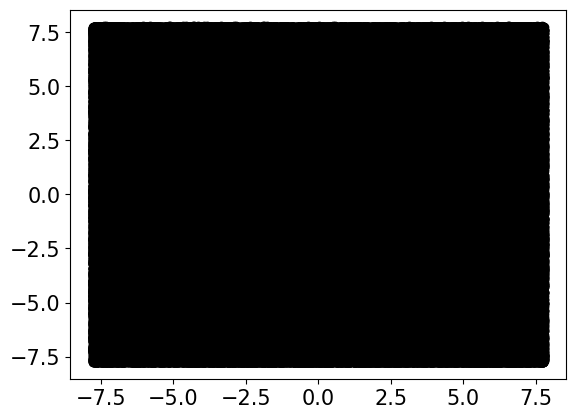

In [19]:
x = np.array([])
y = np.array([])

# # These help center the disk at the center so we can apply a box cut
x_shift = -3.7-7.775
y_shift = -6.4-7.775
box_width =7.775

for i, filename in enumerate(filenames):

    # if (i > 500): break
    
    print("Processing file:", i+1, "/", len(filenames), end="\r")

    # if (i > 5000): continue
    particles     = pd.read_hdf(filename, "/MC/particles/", columns = ["initial_x", "initial_y"])
    # particles.initial_x = particles.initial_x + x_shift
    # particles.initial_y = particles.initial_y + y_shift

    particles = particles[(particles['initial_x']+ x_shift >= -box_width) & (particles['initial_x']+ x_shift <= box_width) & (particles['initial_y']+ y_shift >= -box_width) & (particles['initial_y']+ y_shift <= box_width)]


    x = np.append(x, particles.initial_x)
    y = np.append(y, particles.initial_y)


plt.figure()
plt.scatter(x+x_shift,y+y_shift, color = "black")
print(x.mean())
print(y.mean())

In [8]:
t0 = time.time()

for i, filename in enumerate(filenames):

    # if (i == 1): break
    
    print("Processing file:", i+1, "/", len(filenames), end="\r")

    # if (i > 5000): continue
    
    configuration = pd.read_hdf(filename, "/MC/configuration").set_index("param_key")
    particles     = pd.read_hdf(filename, "/MC/particles/")
    sns_response  = pd.read_hdf(filename, "/MC/sns_response")
    sns_positions = pd.read_hdf(filename, "/MC/sns_positions")

    # Apply a box cut
    particles = particles[(particles['initial_x']+ x_shift >= -box_width) & (particles['initial_x']+ x_shift <= box_width) & (particles['initial_y']+ y_shift >= -box_width) & (particles['initial_y']+ y_shift <= box_width)]

    Nphotons = int(configuration.loc["/Generator/ScintGenerator/nphotons"][0])
    nphotons_in_file.append(Nphotons)
    
    # select SIPMs -- matching across the dataframes
    sns_response = sns_response[np.isin(sns_response["sensor_id"], datasipm["SensorID"])]
    
    # Loop over the events
    for event_id, particle in particles.groupby("event_id"):
        x = particle["initial_x"].values
        y = particle["initial_y"].values
        z = particle["initial_z"].values

        # distances from emission point

        # Drop ChannelID, adc_to_pes and Sigma columns since they are not needed
        distances_df          = pd.DataFrame.copy(datasipm.drop(["ChannelID", "adc_to_pes", "Sigma"], axis=1))
        
        # Distance from SiPM to emission point
        distances_df["d"]     = ((distances_df["X"]-x)**2 + (distances_df["Y"]-y)**2)**0.5
        
        # Bin the distances
        distances_df["d_bin"] = pd.cut(distances_df["d"], bins=dbins, labels=dbins[:-1], include_lowest=True)
        
        # Set the SensorID as the index rows
        distances_df = distances_df.set_index("SensorID")

        # Get the SiPM response for this event
        responses = sns_response[sns_response["event_id"]==event_id]
        # display(responses)

        # charge per sensor
        charges = responses.groupby("sensor_id")["charge"].sum() # sum over all the time bins and give back sensorid vs charge for this event
        
        # Change the index from sensor_id to SensorID
        charges = charges.reindex(datasipm["SensorID"], fill_value=0)
        
        # Add the charges column to the distances dataframe
        distances_df["charge"] = charges

        # Sum over all the charge in a given distance bin
        total_charge = distances_df.groupby("d_bin")["charge"].sum()
       
        # Get the total numner of entries in a given bin
        entries      = distances_df.groupby("d_bin")["d"]     .nunique()

        # Bin the z-values, if NaN, value is outside bin range so continue
        zbin = pd.cut(-z, bins=zbins, labels=zbins[:-1])[0]
        if np.isnan(zbin): continue
        
        # Get the dataframe of the z-slice
        df = dfs[zbin]

        # Add the charge for the event to the slice
        df["charge"]  = df["charge"]  + total_charge
        df["entries"] = df["entries"] + entries
        
        # Set the dataframe
        dfs[zbin] = df
        
        nevents[zbin] += 1

nphotons_in_file = np.array(nphotons_in_file)
Nphotons = nphotons_in_file[0]
assert np.all(nphotons_in_file == Nphotons)

print(f"Time (total {sum(list(nevents.values()))} events):", (time.time()-t0)/60.)

Time (total 624392 events): 57.97732514937719


In [9]:
psf = pd.DataFrame()
for zbin in dfs:
    psf[zbin] = dfs[zbin]["charge"]/dfs[zbin]["entries"]/Nphotons

display(psf[0])

d_bin
0      6.047568e-05
1      5.739817e-05
2      5.549401e-05
3      5.495089e-05
4      5.429517e-05
           ...     
495    7.464474e-08
496    7.337503e-08
497    7.185071e-08
498    7.011171e-08
499    6.864204e-08
Name: 0.0, Length: 500, dtype: float64

In [10]:
signal_type = "S2"

for i, zbin in enumerate(zbins[:-1]):
    psf = psf.rename({zbin: "z_m" + str(int(zbins[i+1]))}, axis=1)

psf = psf.reset_index().rename({"d_bin": "dist_xy"}, axis=1)
display(psf)

,dist_xy,z_m1,z_m2,z_m3,z_m4,z_m5,z_m6,z_m7,z_m8,z_m9,z_m10
0,0,6.047568e-05,6.368782e-05,6.967246e-05,7.414853e-05,7.816082e-05,8.309703e-05,9.023057e-05,9.895276e-05,1.122169e-04,1.252491e-04
1,1,5.739817e-05,6.194745e-05,6.635902e-05,7.316005e-05,8.047375e-05,8.967902e-05,9.704679e-05,1.040255e-04,1.121747e-04,1.262870e-04
2,2,5.549401e-05,6.005871e-05,6.549792e-05,7.134439e-05,7.717614e-05,8.328905e-05,9.102755e-05,1.003919e-04,1.099197e-04,1.176923e-04
3,3,5.495089e-05,5.905199e-05,6.328833e-05,6.848446e-05,7.329104e-05,7.920029e-05,8.603628e-05,9.438600e-05,1.024223e-04,1.106531e-04
4,4,5.429517e-05,5.776777e-05,6.202950e-05,6.710434e-05,7.232884e-05,7.840971e-05,8.578184e-05,9.186485e-05,9.734382e-05,1.063959e-04
...,...,...,...,...,...,...,...,...,...,...,...
495,495,7.464474e-08,7.424462e-08,7.445386e-08,7.444562e-08,7.519948e-08,7.435717e-08,7.458128e-08,7.488616e-08,7.457596e-08,7.510916e-08
496,496,7.337503e-08,7.338607e-08,7.308375e-08,7.352972e-08,7.307897e-08,7.355727e-08,7.433655e-08,7.348910e-08,7.353187e-08,7.380622e-08
497,497,7.185071e-08,7.230165e-08,7.172793e-08,7.175926e-08,7.262364e-08,7.233774e-08,7.270838e-08,7.218853e-08,7.214657e-08,7.178256e-08
498,498,7.011171e-08,7.072289e-08,7.016512e-08,6.995896e-08,7.114646e-08,7.062855e-08,7.044935e-08,7.112616e-08,7.169120e-08,7.082886e-08


In [11]:
if psf.isna().values.any():
    raise Exception("NaN values in table!")

In [12]:
save = True
outfilename = f"../LT/NEXT100_PSF_square.h5"

if save:
    with tb.open_file(outfilename, 'w') as h5out:
        df_writer(h5out, psf, "PSF", "LightTable")

In [13]:
# create PSF config
config = { "detector"   : "next100"
         , "ACTIVE_rad" : str(1000/2.) #compulsory
         , "EL_GAP"     : str(10.0)    #compulsory
         , "signal_type": signal_type
         , "sensor"     : "SIPM"       #compulsory
         , "pitch_z"    : str(dz)      #compulsory
         , "nexus"      : "v7_08_00"}
config = pd.DataFrame({"parameter": config.keys(), "value": config.values()})

if save:
    with tb.open_file(outfilename, 'r+') as h5out:
        df_writer( h5out, config, "PSF", "Config"
                 , str_col_length = config.applymap(lambda x: len(x)).values.max())

In [14]:
# # copy MC configuration
# configuration = load_dst(filenames[0], "MC", "configuration")

# if save:
#     with tb.open_file(outfilename, 'r+') as h5out:
#         df_writer( h5out, config, "PSF", "configuration"
#                  , str_col_length = configuration.applymap(lambda x: len(x)).values.max())

In [15]:
psf    = load_dst(outfilename, "PSF", "LightTable")
config = load_dst(outfilename, "PSF", "Config")

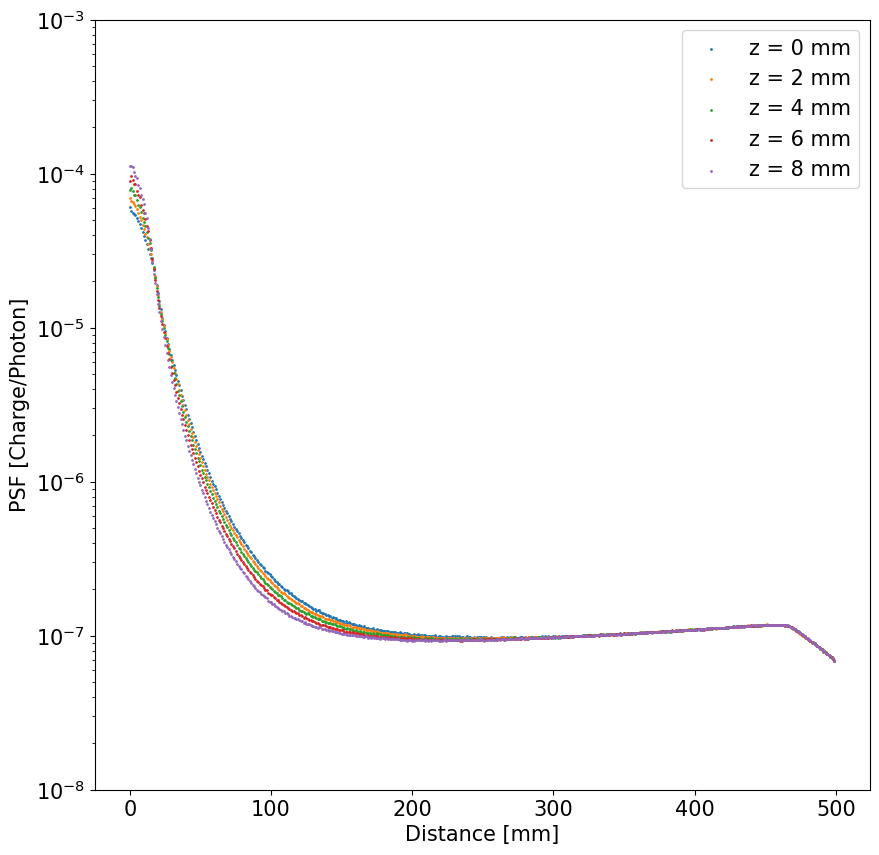

In [16]:
i = 0
%matplotlib inline

fig, ax = plt.subplots(1, figsize=[10, 10])
for i in range(0, 10,2):
    #PSF.index is the distance, r, Psf (z_X)
    ax.scatter(psf.index, psf[f"z_m{i+1}"], s=1, label="z = {0} mm".format(i), linestyle="-")
    
    ax.set_yscale("log")
    ax.set_ylim(1e-8, 1e-3)

ax.set_ylabel("PSF [Charge/Photon]")
ax.set_xlabel("Distance [mm]")
ax.legend()
plt.savefig("PSF.pdf")
plt.show()